# Natural Langauge Processing Introductory Application
Advisement:
Please note that this code was derived from https://towardsdatascience.com/gentle-start-to-natural-language-processing-using-python-6e46c07addf3
. The implementation of this code is for learning purposes only.
All rights are accredited to the original author. In this jupyter notebook, word frequencies are analyzed across three news websites in Canada. Specifically, web pages concerning COVID-19 are analyzed. 

In [4]:
# Associated librariers
import nltk
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [5]:
# List of news websites
websites = ["https://www.cbc.ca/news/canada/toronto/contracting-covid19-ontario-1.5548087",
            "https://www.theglobeandmail.com/canada/article-manitoba-to-ease-some-covid-19-restrictions-starting-monday/",
            "https://www.ctvnews.ca/health/coronavirus/"]

In [7]:
# pre-allocate list to store tokens
all_tokens = []
for site in websites:

    response = urllib.request.urlopen(site)
    html = response.read()

    #  pulling data out of HTML and XML files using Beautiful Soup
    soup = BeautifulSoup(html,"lxml")
    text = soup.get_text(strip = True)
    # print(text)

    # tokenize text
    tokens = [t for t in text.split()]
    # print(tokens)

    # Count Word Frequency
    clean_tokens = []
    
    # Clean tokens to remove symbols that may affect key words
    bad_chars = [';', ':', '!', "*","!","@", "#", "$", "%", "^","+","/", "|", "&" ] 
    for item in tokens[:]:
        if item in bad_chars:
            continue
        else:
            clean_tokens.append(item)


    sr= stopwords.words('english')
    # clean_tokens = tokens[:]
    for token in tokens:
        if token in stopwords.words('english'):
            clean_tokens.remove(token)
    
    all_tokens.extend(clean_tokens)

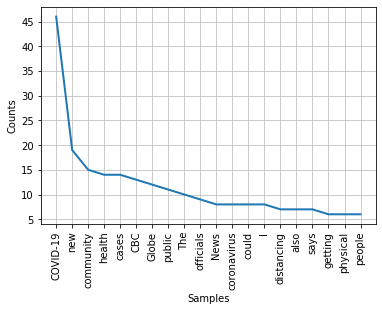

In [9]:
# Display Results
freq = nltk.FreqDist(all_tokens)
freq.plot(20, cumulative=False)